In [63]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
import sys
sys.path.append("/home/evangelos/workspace/Synthesis/FlowMonitoringAndAnalysis/")
import matplotlib.pyplot as plt

In [65]:
from src.models import simple_model
from src.utils import data_generators

In [66]:
gen = data_generators.PRBS_GEN(2048,3)

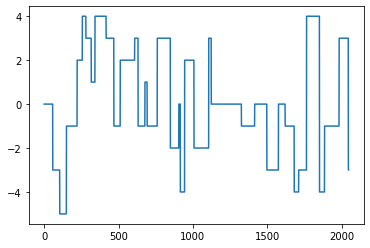

In [78]:
signal = gen.random_signal()
plt.plot(signal[:,2])

In [79]:
prbs = gen.prbs()

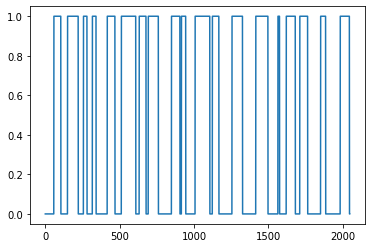

In [80]:
plt.plot(prbs[:,2])

In [85]:
import torch.nn as nn

In [88]:
class EncoderLSTM(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers):
        super(EncoderLSTM, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_dim,
                            hidden_dim,
                            num_layers,
                            batch_first=True)
        self.activation = nn.ReLU()

        # weight initialization
        nn.init.xavier_uniform_(self.lstm.weight_ih_l0, gain=np.sqrt(2))
        nn.init.xavier_uniform_(self.lstm.weight_hh_l0, gain=np.sqrt(2))

    def forward(self, x):
        x, h = self.lstm(x)
        return x



In [89]:
model = EncoderLSTM(3, 16, 2)

In [96]:
model(torch.Tensor(signal[0:100]))

RuntimeError: input must have 3 dimensions, got 2